## Exploratory Data Analysis of the Titanic Disaster

We conduct Exploratory Data Analysis (EDA) on the titanic data set to:

a) Summarize main characteristics of the data

b) Gain better understanding of the data set

c) Uncover relationship between variables

d) Extract important variables for the problem we want to solve

link to the dataset: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "titanic_dataset.csv"

df = pd.read_csv(path)

In [3]:
# understanding the summary of the dataframe to see the datatypes of each column

# this allows to see which Python functions can be applied to a specific column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


There are 12 columns in the dataset each indicating the following:

Survived - survival

Pclass - ticket class

Name - name of the passanger

Sex - gender

Age - passanger's age (in years)

SibSp - number of siblings/spouse travelling together

Parch - number of parents/children travelling together

Ticket - passanger's ticket number

Fare - Passanger's fare; how much the passanger paid for that ticket

Cabin - cabin number assigned to the passanger

Embarked - port of embarkation (C=Charbourg, Q=Queenstown, S=Southampton) 

In [4]:
# we sum up the total number of missing values

df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
# there were 1309 passangers in the titanic train

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are 263 missing values in the Age column, one missing value in the Fare column, 1014 missing values in the Cabin column and 2 missing values in the Embarked column.

In [9]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


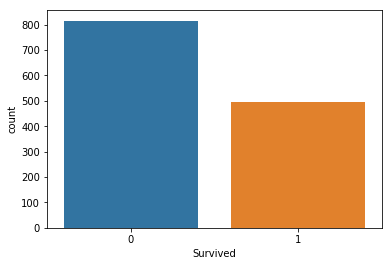

0.37738731856378915

In [5]:
sns.countplot('Survived', data=df)
plt.show()

# actual survival rate:
df['Survived'].mean()

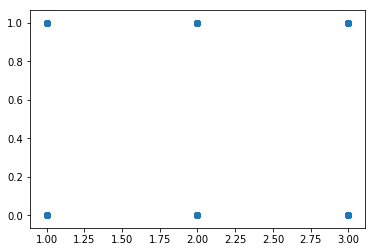

In [15]:
# scatter plot

y = df['Survived'] # target variable
x = df['Pclass']
plt.scatter(x,y)



In [10]:
df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,648.186695,0.82618,2.154506,28.687088,0.652361,0.633047,46.198097
male,658.766311,0.12930,2.372479,30.585228,0.413998,0.247924,26.154601


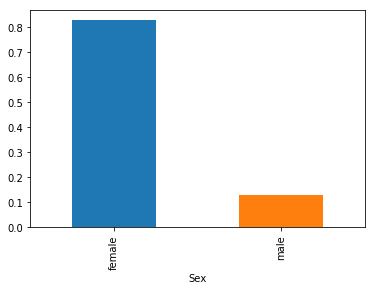

In [11]:
df_grp = df.groupby(['Sex']).mean()
df_grp['Survived'].plot(kind='bar')

In [8]:
df.groupby(['Sex', 'Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        689.652778  0.979167  37.037594  0.555556  0.472222   
       2        632.188679  0.943396  27.499223  0.500000  0.650943   
       3        628.393519  0.666667  22.185329  0.791667  0.731481   
male   1        658.687151  0.251397  41.029272  0.340782  0.279330   
       2        695.976608  0.099415  30.815380  0.327485  0.192982   
       3        645.888438  0.095335  25.962264  0.470588  0.255578   

                     Fare  
Sex    Pclass              
female 1       109.412385  
       2        23.234827  
       3        15.324250  
male   1        69.888385  
       2        19.904946  
       3        12.415462

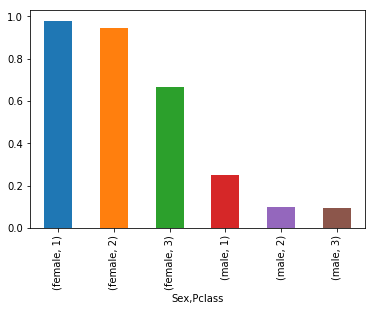

In [7]:
# to get a visualization of the above table we apply the following:

mean_values_df = df.groupby(['Sex','Pclass']).mean()
mean_values_df['Survived'].plot(kind='bar')